In [43]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
dataset = datasets.MNIST('~/Developer/datasets', transform=transforms.ToTensor(), download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100.0%


Extracting /Users/davemeijdam/Developer/datasets/MNIST/raw/train-images-idx3-ubyte.gz to /Users/davemeijdam/Developer/datasets/MNIST/raw



102.8%


Extracting /Users/davemeijdam/Developer/datasets/MNIST/raw/train-labels-idx1-ubyte.gz to /Users/davemeijdam/Developer/datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100.0%


Extracting /Users/davemeijdam/Developer/datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to /Users/davemeijdam/Developer/datasets/MNIST/raw



112.7%
/opt/anaconda3/envs/infoviz/lib/python3.7/site-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting /Users/davemeijdam/Developer/datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/davemeijdam/Developer/datasets/MNIST/raw

Processing...
Done!


In [15]:
mask = (dataset[1][0][0]>=0.8)
torch.arange(784)[mask.view(-1)]

tensor([129, 155, 156, 157, 158, 159, 182, 183, 184, 185, 186, 187, 209, 210,
        211, 212, 215, 216, 236, 237, 238, 239, 240, 241, 244, 263, 264, 265,
        268, 269, 272, 290, 291, 292, 300, 301, 318, 319, 320, 328, 329, 345,
        346, 356, 357, 372, 373, 384, 385, 400, 412, 413, 427, 428, 440, 441,
        455, 456, 468, 483, 484, 495, 496, 511, 522, 539, 540, 548, 549, 567,
        568, 574, 575, 576, 595, 596, 597, 598, 599, 600, 601, 602, 624, 625,
        626, 627, 628, 629, 653, 654, 655])

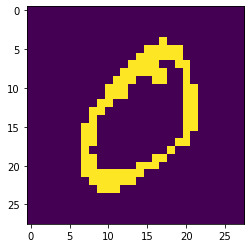

In [16]:
plt.imshow(mask)

In [92]:
class MNIST_Polygon(datasets.MNIST):
    
    def __init__(self, path, train=True, download=False, transform = None):
        super().__init__(root=path, train=train, download=download)
        
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        mask = (x > 0.8).view(-1)
        x = torch.arange(784)[mask]
        x = x.float()
        return x, y
    
    def same_shape(self):
        length_list = []
        
        for x, y in self:
            length_list.append(len(x))
    
        max_length = max(length_list)
        print(max_length)
        print(length_list[:10])

        for x, y in self:
            x = torch.Tensor(list(x) + (max_length - len(x)) * [0])

        length_list = []
        for x, y in self:
            length_list.append(len(x))
        print(length_list[:10])
        
        
    @property
    def raw_folder(self):
        return os.path.join(self.root, 'MNIST', 'raw')

    @property
    def processed_folder(self):
        return os.path.join(self.root, 'MNIST', 'processed')

In [93]:
s = MNIST_Polygon('~/Developer/datasets')

In [95]:
s.same_shape()

351
[166, 176, 120, 96, 142, 188, 93, 200, 68, 130]
tensor([152., 153., 154., 155., 156., 157., 158., 159., 160., 161., 162., 163.,
        176., 177., 178., 179., 180., 181., 182., 183., 184., 185., 186., 187.,
        188., 189., 190., 191., 203., 204., 205., 206., 207., 208., 209., 210.,
        211., 212., 213., 214., 215., 216., 217., 218., 231., 232., 233., 234.,
        235., 236., 237., 238., 239., 240., 241., 260., 261., 262., 263., 264.,
        265., 266., 268., 269., 289., 290., 291., 292., 293., 319., 320., 321.,
        322., 347., 348., 349., 350., 376., 377., 378., 379., 380., 381., 405.,
        406., 407., 408., 409., 410., 434., 435., 436., 437., 438., 439., 463.,
        464., 465., 466., 467., 493., 494., 495., 496., 518., 519., 520., 521.,
        522., 523., 524., 544., 545., 546., 547., 548., 549., 550., 551., 570.,
        571., 572., 573., 574., 575., 576., 577., 578., 596., 597., 598., 599.,
        600., 601., 602., 603., 604., 605., 622., 623., 624., 625., 

tensor([149., 159., 160., 176., 177., 178., 179., 186., 187., 188., 203., 204.,
        205., 206., 207., 214., 215., 216., 217., 230., 231., 232., 233., 234.,
        235., 243., 244., 245., 246., 258., 259., 260., 261., 271., 272., 273.,
        274., 285., 286., 287., 288., 289., 299., 300., 301., 302., 312., 313.,
        314., 315., 316., 327., 328., 329., 330., 340., 341., 342., 343., 344.,
        355., 356., 357., 358., 368., 369., 370., 371., 384., 385., 386., 387.,
        396., 397., 398., 409., 410., 411., 412., 413., 414., 415., 424., 425.,
        426., 427., 428., 429., 430., 431., 432., 433., 434., 435., 436., 437.,
        438., 439., 440., 441., 442., 443., 452., 453., 454., 455., 456., 457.,
        458., 459., 460., 461., 462., 463., 464., 465., 466., 467., 468., 469.,
        470., 471., 481., 482., 483., 484., 485., 486., 487., 488., 489., 490.,
        491., 492., 493., 494., 495., 496., 497., 498., 509., 510., 511., 512.,
        513., 514., 515., 516., 517., 51

tensor([150., 151., 152., 153., 154., 155., 156., 157., 158., 159., 160., 176.,
        177., 178., 179., 180., 181., 182., 183., 184., 185., 186., 187., 188.,
        189., 202., 203., 204., 205., 206., 207., 208., 209., 210., 211., 212.,
        213., 214., 215., 216., 217., 230., 231., 232., 233., 234., 235., 236.,
        237., 238., 239., 240., 241., 242., 243., 244., 245., 258., 259., 260.,
        261., 263., 268., 269., 270., 271., 272., 286., 287., 288., 289., 291.,
        294., 295., 296., 297., 298., 299., 300., 320., 321., 322., 323., 324.,
        325., 326., 327., 328., 348., 349., 350., 351., 352., 353., 354., 375.,
        376., 377., 378., 379., 380., 381., 400., 401., 402., 403., 404., 405.,
        406., 407., 427., 428., 429., 430., 431., 432., 433., 454., 455., 456.,
        457., 458., 459., 460., 469., 470., 471., 472., 481., 482., 483., 484.,
        485., 486., 487., 490., 491., 492., 493., 494., 495., 496., 497., 498.,
        499., 500., 509., 510., 511., 51

tensor([155., 156., 157., 183., 184., 185., 211., 212., 213., 239., 240., 241.,
        266., 267., 268., 269., 294., 295., 296., 321., 322., 323., 324., 349.,
        350., 351., 352., 377., 378., 379., 380., 405., 406., 407., 408., 433.,
        434., 435., 461., 462., 463., 489., 490., 491., 516., 517., 518., 544.,
        545., 546., 572., 573., 574., 600., 601., 602., 628., 629., 630., 656.,
        657., 658., 659., 685., 686., 687.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

tensor([124., 125., 126., 127., 150., 151., 152., 153., 154., 155., 156., 178.,
        179., 180., 181., 182., 183., 184., 204., 205., 206., 207., 208., 209.,
        210., 211., 212., 213., 214., 232., 233., 234., 235., 236., 237., 238.,
        239., 240., 241., 242., 243., 260., 261., 262., 263., 266., 267., 268.,
        269., 270., 271., 272., 273., 287., 288., 289., 290., 291., 295., 296.,
        297., 298., 299., 300., 301., 302., 315., 316., 317., 318., 325., 326.,
        327., 328., 329., 330., 331., 342., 343., 344., 345., 356., 357., 358.,
        359., 360., 370., 371., 372., 373., 384., 385., 386., 387., 388., 398.,
        399., 400., 401., 413., 414., 415., 416., 425., 426., 427., 428., 441.,
        442., 443., 444., 453., 454., 455., 456., 469., 470., 471., 472., 481.,
        482., 483., 484., 497., 498., 499., 500., 509., 510., 511., 512., 525.,
        526., 527., 528., 537., 538., 539., 540., 552., 553., 554., 555., 556.,
        565., 566., 567., 568., 569., 57

tensor([202., 203., 204., 205., 206., 207., 208., 209., 210., 211., 212., 213.,
        214., 215., 230., 231., 232., 233., 234., 235., 236., 237., 238., 239.,
        240., 241., 242., 243., 258., 259., 260., 261., 262., 263., 264., 265.,
        266., 267., 268., 269., 270., 271., 289., 290., 297., 298., 299., 325.,
        326., 327., 353., 354., 355., 380., 381., 382., 383., 408., 409., 410.,
        435., 436., 437., 438., 463., 464., 465., 490., 491., 492., 493., 518.,
        519., 520., 521., 545., 546., 547., 548., 573., 574., 575., 576., 601.,
        602., 603., 629., 630., 631., 657., 658., 659., 685., 686., 687., 713.,
        714., 715., 716., 717., 741., 742., 743., 744., 745.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

tensor([127., 128., 129., 130., 131., 154., 155., 156., 157., 158., 159., 160.,
        180., 181., 182., 183., 184., 185., 186., 187., 188., 207., 208., 209.,
        210., 211., 212., 213., 214., 215., 216., 234., 235., 236., 237., 238.,
        239., 240., 241., 242., 243., 244., 261., 262., 263., 264., 265., 266.,
        267., 268., 269., 270., 271., 272., 289., 290., 291., 292., 293., 294.,
        295., 296., 297., 298., 299., 317., 318., 319., 320., 321., 322., 323.,
        324., 325., 326., 327., 345., 346., 347., 348., 349., 350., 351., 352.,
        353., 354., 374., 375., 376., 377., 378., 379., 380., 381., 402., 403.,
        404., 405., 406., 407., 408., 431., 432., 433., 434., 435., 436., 437.,
        458., 459., 460., 461., 462., 463., 464., 465., 466., 486., 487., 488.,
        489., 490., 491., 492., 493., 494., 495., 513., 514., 515., 516., 517.,
        518., 519., 520., 521., 522., 523., 524., 541., 542., 543., 544., 545.,
        546., 547., 548., 549., 550., 55

tensor([ 92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 120., 121., 122., 123.,
        124., 125., 126., 127., 128., 129., 148., 149., 150., 151., 152., 153.,
        154., 155., 156., 157., 158., 182., 183., 184., 185., 186., 211., 212.,
        213., 214., 239., 240., 241., 242., 267., 268., 269., 270., 294., 295.,
        296., 297., 298., 322., 323., 324., 325., 349., 350., 351., 352., 353.,
        377., 378., 379., 380., 403., 404., 405., 406., 407., 408., 431., 432.,
        433., 434., 435., 459., 460., 461., 462., 472., 473., 486., 487., 488.,
        489., 490., 492., 493., 494., 495., 496., 497., 498., 499., 500., 501.,
        512., 513., 514., 515., 516., 517., 518., 519., 520., 521., 522., 523.,
        524., 525., 526., 527., 528., 529., 539., 540., 541., 542., 543., 544.,
        545., 546., 547., 548., 549., 550., 551., 552., 553., 566., 567., 568.,
        569., 570., 571., 572., 573., 574., 575., 576., 577., 578., 579., 580.,
        594., 595., 596., 597., 598., 59

tensor([157., 158., 159., 163., 164., 165., 166., 182., 183., 184., 185., 186.,
        187., 188., 191., 192., 193., 194., 209., 210., 211., 212., 213., 214.,
        215., 216., 218., 219., 220., 221., 222., 235., 236., 237., 238., 239.,
        240., 241., 242., 243., 244., 245., 246., 247., 248., 249., 250., 262.,
        263., 264., 265., 266., 270., 271., 272., 273., 274., 275., 289., 290.,
        291., 292., 293., 298., 299., 300., 301., 302., 303., 316., 317., 318.,
        319., 320., 321., 325., 326., 327., 328., 329., 330., 344., 345., 346.,
        352., 353., 354., 355., 372., 373., 374., 379., 380., 381., 382., 383.,
        399., 400., 401., 402., 403., 406., 407., 408., 409., 410., 428., 429.,
        430., 431., 432., 433., 434., 435., 436., 457., 458., 459., 460., 461.,
        462., 463., 464., 486., 487., 488., 489., 490., 491., 513., 514., 515.,
        516., 517., 518., 519., 540., 541., 542., 543., 544., 545., 546., 547.,
        548., 567., 568., 569., 570., 57

tensor([185., 186., 187., 188., 211., 212., 213., 214., 215., 216., 237., 238.,
        239., 240., 241., 242., 243., 244., 264., 265., 266., 267., 268., 269.,
        270., 271., 272., 291., 292., 293., 294., 295., 297., 298., 299., 300.,
        301., 318., 319., 320., 321., 322., 324., 325., 326., 327., 328., 329.,
        345., 346., 347., 348., 351., 352., 353., 354., 355., 356., 373., 374.,
        375., 376., 378., 379., 380., 381., 382., 383., 401., 402., 403., 404.,
        405., 406., 407., 408., 409., 410., 429., 430., 431., 432., 433., 434.,
        435., 436., 437., 438., 446., 457., 458., 459., 460., 461., 462., 463.,
        464., 487., 488., 489., 490., 491., 492., 515., 516., 517., 518., 519.,
        542., 543., 544., 545., 546., 569., 570., 571., 572., 596., 597., 598.,
        599., 600., 623., 624., 625., 626., 651., 652., 653., 654., 679., 680.,
        681., 707., 708.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

tensor([128., 129., 130., 131., 132., 133., 154., 155., 156., 157., 158., 159.,
        160., 161., 162., 180., 181., 182., 183., 184., 185., 186., 187., 188.,
        189., 190., 206., 207., 208., 209., 210., 211., 212., 213., 214., 215.,
        216., 217., 218., 233., 234., 235., 236., 237., 238., 239., 240., 243.,
        244., 245., 246., 259., 260., 261., 262., 263., 264., 265., 266., 271.,
        272., 273., 274., 287., 288., 289., 290., 291., 292., 293., 299., 300.,
        301., 302., 315., 316., 317., 318., 326., 327., 328., 329., 330., 344.,
        345., 354., 355., 356., 357., 358., 382., 383., 384., 385., 409., 410.,
        411., 412., 413., 436., 437., 438., 439., 440., 441., 457., 458., 459.,
        460., 461., 462., 463., 464., 465., 466., 467., 468., 469., 470., 480.,
        481., 482., 483., 484., 485., 486., 487., 488., 489., 490., 491., 492.,
        493., 494., 495., 496., 497., 498., 507., 508., 509., 510., 511., 512.,
        513., 514., 515., 516., 517., 51

tensor([126., 127., 128., 154., 155., 156., 157., 158., 159., 160., 182., 183.,
        184., 185., 186., 187., 188., 189., 210., 211., 212., 213., 214., 215.,
        216., 217., 218., 243., 244., 245., 246., 271., 272., 273., 274., 299.,
        300., 301., 302., 327., 328., 329., 330., 355., 356., 357., 358., 381.,
        382., 383., 384., 385., 405., 406., 407., 408., 409., 410., 411., 412.,
        413., 414., 415., 431., 432., 433., 434., 435., 436., 437., 438., 439.,
        440., 441., 442., 443., 456., 457., 458., 459., 460., 461., 462., 463.,
        464., 465., 466., 467., 468., 469., 470., 471., 483., 484., 485., 486.,
        487., 488., 489., 490., 491., 492., 493., 510., 511., 512., 513., 514.,
        515., 516., 517., 518., 519., 536., 537., 538., 539., 540., 541., 542.,
        543., 544., 545., 546., 564., 565., 566., 567., 568., 569., 570., 571.,
        572., 592., 593., 594., 595., 596., 597., 598., 620., 621., 622., 623.,
        624.,   0.,   0.,   0.,   0.,   

tensor([152., 153., 154., 161., 162., 163., 180., 181., 182., 188., 189., 190.,
        191., 208., 209., 210., 216., 217., 218., 236., 237., 238., 243., 244.,
        245., 246., 264., 265., 266., 271., 272., 273., 291., 292., 293., 294.,
        298., 299., 300., 301., 319., 320., 321., 322., 326., 327., 328., 346.,
        347., 348., 349., 353., 354., 355., 356., 373., 374., 375., 376., 377.,
        381., 382., 383., 384., 401., 402., 403., 404., 409., 410., 411., 427.,
        428., 429., 430., 431., 436., 437., 438., 439., 454., 455., 456., 457.,
        458., 459., 460., 461., 463., 464., 465., 466., 481., 482., 483., 484.,
        485., 486., 487., 488., 489., 490., 491., 492., 493., 494., 509., 510.,
        511., 515., 516., 517., 518., 519., 520., 521., 522., 546., 547., 548.,
        549., 573., 574., 575., 576., 601., 602., 603., 628., 629., 630., 631.,
        656., 657., 658., 683., 684., 685., 686.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

tensor([153., 154., 155., 156., 157., 158., 159., 160., 161., 162., 163., 164.,
        180., 181., 182., 183., 184., 185., 186., 187., 188., 189., 190., 191.,
        192., 207., 208., 209., 210., 211., 212., 213., 214., 215., 216., 217.,
        218., 219., 220., 234., 235., 236., 237., 238., 239., 261., 262., 263.,
        264., 265., 266., 287., 288., 289., 290., 291., 292., 293., 294., 314.,
        315., 316., 317., 318., 319., 320., 321., 322., 323., 324., 325., 326.,
        341., 342., 343., 344., 345., 346., 347., 348., 349., 350., 351., 352.,
        353., 354., 355., 356., 369., 370., 371., 372., 373., 374., 375., 376.,
        377., 378., 379., 380., 381., 382., 383., 384., 385., 397., 398., 399.,
        400., 401., 402., 403., 404., 405., 406., 407., 408., 409., 410., 411.,
        412., 413., 414., 426., 427., 428., 429., 430., 438., 439., 440., 441.,
        442., 466., 467., 468., 469., 470., 494., 495., 496., 497., 498., 521.,
        522., 523., 524., 525., 526., 53

tensor([158., 159., 160., 161., 162., 183., 184., 185., 186., 187., 188., 189.,
        190., 210., 211., 212., 213., 214., 215., 216., 237., 238., 239., 240.,
        241., 242., 264., 265., 266., 267., 268., 292., 293., 294., 295., 319.,
        320., 321., 322., 346., 347., 348., 349., 350., 351., 352., 353., 373.,
        374., 375., 376., 377., 378., 379., 380., 381., 382., 401., 402., 403.,
        404., 405., 406., 407., 408., 409., 410., 411., 429., 430., 431., 432.,
        437., 438., 439., 465., 466., 467., 491., 492., 493., 494., 495., 512.,
        513., 518., 519., 520., 521., 522., 540., 541., 542., 543., 544., 545.,
        546., 547., 548., 549., 568., 569., 570., 571., 572., 573., 574., 575.,
        596., 597., 598., 599., 600., 601., 679., 680., 681., 682., 683., 684.,
        685., 686., 687., 688., 689., 690., 691., 692., 693., 694.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

tensor([202., 203., 204., 205., 206., 207., 208., 211., 212., 213., 230., 231.,
        232., 233., 234., 235., 236., 237., 238., 239., 240., 241., 259., 260.,
        261., 262., 263., 264., 265., 266., 267., 268., 269., 288., 289., 290.,
        291., 292., 293., 294., 295., 296., 297., 323., 324., 325., 351., 352.,
        353., 378., 379., 380., 381., 406., 407., 408., 409., 434., 435., 436.,
        437., 462., 463., 464., 465., 490., 491., 492., 493., 518., 519., 520.,
        546., 547., 548., 574., 575., 576., 577., 602., 603., 604., 605., 630.,
        631., 632., 633., 658., 659., 660., 661., 687., 688., 689., 715., 716.,
        717., 743., 744., 745.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

tensor([121., 122., 123., 124., 125., 126., 148., 149., 150., 151., 152., 153.,
        154., 155., 175., 176., 177., 178., 179., 180., 181., 182., 183., 184.,
        202., 203., 204., 205., 206., 207., 208., 209., 210., 211., 212., 213.,
        214., 230., 231., 232., 233., 234., 235., 236., 237., 238., 239., 240.,
        241., 242., 243., 244., 258., 259., 260., 261., 262., 263., 264., 265.,
        266., 267., 268., 269., 270., 271., 272., 273., 286., 287., 288., 289.,
        290., 291., 294., 295., 296., 297., 298., 299., 300., 301., 302., 314.,
        315., 316., 317., 318., 324., 325., 326., 327., 328., 329., 330., 331.,
        342., 343., 344., 345., 354., 355., 356., 357., 358., 359., 370., 371.,
        372., 373., 383., 384., 385., 386., 387., 388., 398., 399., 400., 401.,
        402., 412., 413., 414., 415., 416., 426., 427., 428., 429., 430., 441.,
        442., 443., 444., 454., 455., 456., 457., 458., 469., 470., 471., 472.,
        482., 483., 484., 485., 486., 48

          0.,   0.,   0.])
tensor([154., 155., 156., 157., 158., 159., 160., 180., 181., 182., 183., 184.,
        185., 186., 187., 188., 189., 207., 208., 209., 210., 211., 212., 213.,
        214., 215., 216., 217., 218., 234., 235., 236., 237., 238., 239., 242.,
        243., 244., 245., 246., 247., 262., 263., 264., 265., 266., 271., 272.,
        273., 274., 275., 276., 290., 291., 292., 293., 298., 299., 300., 301.,
        302., 303., 304., 317., 318., 319., 320., 324., 325., 326., 327., 328.,
        329., 330., 331., 332., 345., 346., 347., 348., 349., 351., 352., 353.,
        354., 355., 356., 357., 358., 374., 375., 376., 377., 378., 379., 380.,
        381., 382., 383., 384., 402., 403., 404., 405., 406., 407., 408., 409.,
        410., 431., 432., 433., 434., 435., 436., 458., 459., 460., 461., 462.,
        463., 485., 486., 487., 488., 489., 490., 491., 492., 512., 513., 514.,
        515., 516., 517., 518., 519., 520., 540., 541., 542., 543., 544., 545.,
        546.,

tensor([231., 232., 233., 234., 235., 236., 237., 238., 239., 240., 241., 242.,
        243., 244., 245., 246., 258., 259., 260., 261., 262., 263., 264., 265.,
        266., 267., 268., 269., 270., 271., 272., 273., 274., 284., 285., 286.,
        287., 288., 289., 290., 291., 292., 293., 294., 295., 296., 297., 298.,
        299., 300., 301., 302., 303., 312., 313., 314., 315., 316., 317., 318.,
        319., 320., 321., 322., 323., 324., 325., 326., 327., 328., 329., 330.,
        331., 340., 341., 342., 343., 344., 345., 346., 347., 348., 349., 350.,
        351., 352., 353., 354., 355., 356., 357., 358., 359., 368., 369., 370.,
        371., 372., 373., 374., 375., 376., 377., 378., 379., 380., 381., 382.,
        383., 384., 385., 386., 387., 410., 411., 412., 413., 414., 437., 438.,
        439., 440., 441., 442., 463., 464., 465., 466., 467., 468., 469., 491.,
        492., 493., 494., 495., 496., 518., 519., 520., 521., 522., 523., 544.,
        545., 546., 547., 548., 549., 55

tensor([241., 242., 254., 263., 264., 265., 266., 267., 268., 269., 270., 271.,
        272., 273., 282., 287., 288., 289., 290., 291., 292., 293., 294., 295.,
        296., 297., 298., 299., 300., 301., 310., 315., 316., 317., 318., 319.,
        320., 321., 322., 323., 324., 325., 326., 327., 328., 329., 338., 343.,
        344., 345., 346., 347., 354., 355., 356., 357., 366., 380., 381., 382.,
        383., 384., 385., 407., 408., 409., 410., 411., 412., 434., 435., 436.,
        437., 438., 439., 461., 462., 463., 464., 465., 466., 488., 489., 490.,
        491., 492., 515., 516., 517., 518., 519., 542., 543., 544., 545., 546.,
        569., 570., 571., 572., 573., 597., 598., 599., 600., 625., 626., 627.,
        628.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

tensor([117., 118., 119., 120., 121., 122., 123., 124., 125., 126., 127., 145.,
        146., 147., 148., 149., 150., 151., 152., 153., 154., 155., 156., 174.,
        175., 176., 177., 178., 179., 180., 181., 182., 183., 184., 185., 204.,
        205., 210., 211., 212., 213., 238., 239., 240., 241., 265., 266., 267.,
        268., 291., 292., 293., 294., 295., 317., 318., 319., 320., 321., 322.,
        323., 345., 346., 347., 348., 349., 350., 351., 352., 353., 354., 373.,
        374., 375., 376., 377., 378., 379., 380., 381., 382., 383., 384., 385.,
        402., 403., 405., 406., 407., 408., 409., 410., 411., 412., 413., 414.,
        437., 438., 439., 440., 441., 442., 467., 468., 469., 470., 494., 495.,
        496., 497., 498., 520., 521., 522., 523., 524., 525., 546., 547., 548.,
        549., 550., 551., 552., 553., 566., 567., 568., 569., 571., 572., 573.,
        574., 575., 576., 577., 578., 579., 594., 595., 596., 597., 598., 599.,
        600., 601., 602., 603., 604., 60

tensor([153., 154., 155., 156., 157., 158., 159., 160., 177., 178., 179., 180.,
        181., 182., 183., 184., 185., 186., 187., 188., 189., 204., 205., 206.,
        207., 208., 209., 210., 211., 212., 213., 214., 215., 216., 217., 218.,
        231., 232., 233., 234., 235., 236., 237., 238., 239., 240., 241., 242.,
        243., 244., 245., 246., 258., 259., 260., 261., 262., 263., 264., 265.,
        266., 270., 271., 272., 273., 274., 275., 285., 286., 287., 288., 289.,
        290., 291., 300., 301., 302., 303., 312., 313., 314., 315., 316., 317.,
        328., 329., 330., 331., 340., 341., 342., 343., 344., 345., 356., 357.,
        358., 359., 368., 369., 370., 371., 372., 384., 385., 386., 387., 396.,
        397., 398., 399., 400., 401., 402., 412., 413., 414., 415., 424., 425.,
        426., 427., 428., 429., 440., 441., 442., 443., 452., 453., 454., 455.,
        456., 468., 469., 470., 471., 480., 481., 482., 483., 484., 495., 496.,
        497., 498., 499., 509., 510., 51

tensor([ 99., 100., 101., 102., 103., 104., 105., 126., 127., 128., 129., 130.,
        131., 132., 133., 134., 149., 150., 151., 152., 153., 154., 155., 156.,
        157., 158., 159., 160., 161., 162., 175., 176., 177., 178., 179., 180.,
        181., 182., 183., 184., 185., 186., 187., 188., 189., 202., 203., 204.,
        205., 206., 207., 208., 209., 210., 211., 212., 213., 214., 215., 216.,
        217., 230., 231., 232., 233., 234., 235., 236., 237., 238., 239., 240.,
        241., 242., 243., 244., 258., 259., 260., 265., 266., 267., 268., 269.,
        270., 271., 272., 273., 291., 292., 293., 294., 295., 296., 297., 298.,
        299., 300., 301., 318., 319., 320., 321., 322., 323., 324., 326., 327.,
        328., 329., 346., 347., 348., 349., 350., 354., 355., 356., 357., 374.,
        375., 376., 382., 383., 384., 385., 410., 411., 412., 413., 438., 439.,
        440., 441., 466., 467., 468., 469., 479., 480., 481., 482., 483., 484.,
        485., 486., 487., 488., 489., 49

tensor([156., 157., 158., 159., 160., 161., 182., 183., 184., 185., 186., 187.,
        188., 189., 190., 209., 210., 211., 212., 213., 214., 215., 216., 217.,
        218., 236., 237., 238., 239., 240., 241., 242., 243., 244., 245., 246.,
        263., 264., 265., 267., 268., 269., 270., 273., 274., 291., 292., 294.,
        295., 296., 297., 300., 301., 302., 320., 321., 322., 323., 324., 328.,
        329., 330., 348., 349., 350., 351., 355., 356., 357., 376., 377., 378.,
        383., 384., 385., 403., 404., 405., 411., 412., 430., 431., 432., 433.,
        438., 439., 440., 457., 458., 459., 460., 461., 466., 467., 468., 485.,
        486., 487., 494., 495., 496., 512., 513., 514., 521., 522., 523., 539.,
        540., 541., 547., 548., 549., 550., 567., 568., 569., 575., 576., 577.,
        594., 595., 596., 601., 602., 603., 604., 621., 622., 623., 627., 628.,
        629., 630., 631., 649., 650., 651., 652., 653., 654., 655., 656., 657.,
        658., 676., 677., 678., 679., 68

tensor([129., 130., 131., 155., 156., 157., 158., 159., 183., 184., 185., 186.,
        187., 210., 211., 212., 213., 214., 215., 238., 239., 240., 241., 242.,
        243., 266., 267., 268., 269., 270., 292., 293., 294., 295., 296., 297.,
        298., 320., 321., 322., 323., 324., 325., 348., 349., 350., 351., 352.,
        353., 376., 377., 378., 379., 380., 381., 403., 404., 405., 406., 407.,
        431., 432., 433., 434., 435., 458., 459., 460., 461., 462., 463., 486.,
        487., 488., 489., 490., 491., 514., 515., 516., 517., 518., 541., 542.,
        543., 544., 545., 546., 569., 570., 571., 572., 573., 574., 597., 598.,
        599., 600., 601., 602., 625., 626., 627., 628., 629., 630., 653., 654.,
        655., 656., 657.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

          0.,   0.,   0.])
tensor([154., 155., 156., 157., 158., 159., 180., 181., 182., 183., 184., 185.,
        186., 187., 207., 208., 209., 210., 211., 212., 213., 214., 215., 216.,
        234., 235., 236., 237., 238., 239., 240., 241., 242., 243., 244., 262.,
        263., 264., 265., 266., 267., 268., 269., 270., 271., 272., 290., 291.,
        292., 293., 294., 295., 296., 297., 298., 299., 300., 301., 302., 303.,
        304., 317., 318., 319., 320., 321., 322., 323., 325., 326., 327., 328.,
        329., 330., 331., 332., 346., 347., 348., 349., 350., 351., 352., 353.,
        354., 355., 356., 357., 358., 359., 360., 370., 371., 372., 373., 374.,
        375., 376., 377., 378., 379., 380., 381., 382., 383., 384., 385., 386.,
        387., 388., 397., 398., 399., 400., 401., 402., 403., 404., 405., 406.,
        407., 408., 409., 410., 411., 412., 413., 414., 415., 416., 425., 426.,
        427., 428., 429., 430., 431., 432., 433., 434., 435., 436., 437., 438.,
        439.,

tensor([ 97.,  98.,  99., 100., 124., 125., 126., 127., 128., 129., 152., 153.,
        154., 155., 156., 157., 179., 180., 181., 182., 183., 184., 185., 207.,
        208., 209., 210., 211., 212., 234., 235., 236., 237., 238., 239., 240.,
        262., 263., 264., 265., 266., 267., 289., 290., 291., 292., 293., 294.,
        295., 317., 318., 319., 320., 321., 322., 323., 344., 345., 346., 347.,
        348., 349., 350., 372., 373., 374., 375., 376., 377., 400., 401., 402.,
        403., 404., 428., 429., 430., 431., 432., 438., 439., 440., 456., 457.,
        458., 459., 460., 464., 465., 466., 467., 468., 484., 485., 486., 487.,
        488., 490., 491., 492., 493., 494., 495., 496., 497., 510., 513., 514.,
        515., 516., 517., 518., 519., 520., 521., 522., 523., 524., 525., 538.,
        541., 542., 543., 544., 545., 546., 547., 548., 549., 550., 551., 552.,
        553., 569., 570., 571., 572., 573., 574., 575., 576., 577., 578., 579.,
        580., 581., 599., 600., 601., 60

tensor([181., 182., 183., 184., 185., 186., 187., 207., 208., 209., 210., 211.,
        212., 213., 214., 215., 235., 236., 237., 238., 239., 240., 241., 242.,
        243., 262., 263., 264., 265., 266., 267., 268., 269., 270., 271., 272.,
        289., 290., 291., 292., 293., 297., 298., 299., 300., 317., 318., 319.,
        320., 324., 325., 326., 327., 328., 344., 345., 346., 347., 348., 349.,
        350., 351., 352., 353., 354., 355., 372., 373., 374., 375., 376., 377.,
        378., 379., 380., 381., 382., 400., 401., 402., 403., 404., 405., 406.,
        407., 408., 409., 410., 429., 430., 431., 432., 433., 434., 435., 436.,
        437., 438., 461., 462., 463., 464., 465., 489., 490., 491., 492., 493.,
        516., 517., 518., 519., 520., 544., 545., 546., 547., 548., 572., 573.,
        574., 575., 599., 600., 601., 602., 603., 627., 628., 629., 630., 654.,
        655., 656., 657., 658., 682., 683., 684., 685., 710., 711., 712.,   0.,
          0.,   0.,   0.,   0.,   0.,   

tensor([157., 158., 183., 184., 185., 186., 187., 211., 212., 213., 214., 215.,
        238., 239., 240., 241., 242., 266., 267., 268., 269., 270., 293., 294.,
        295., 296., 297., 321., 322., 323., 324., 325., 348., 349., 350., 351.,
        352., 353., 376., 377., 378., 379., 380., 403., 404., 405., 406., 407.,
        431., 432., 433., 434., 435., 459., 460., 461., 462., 463., 487., 488.,
        489., 490., 491., 515., 516., 517., 518., 543., 544., 545., 546., 570.,
        571., 572., 573., 574., 597., 598., 599., 600., 601., 625., 626., 627.,
        628., 629., 653., 654., 655., 656., 657., 681., 682., 683., 684.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

tensor([149., 150., 151., 152., 153., 154., 155., 156., 157., 158., 159., 176.,
        177., 178., 179., 180., 181., 182., 183., 184., 185., 186., 187., 204.,
        205., 206., 207., 208., 209., 210., 211., 212., 213., 214., 215., 231.,
        232., 233., 234., 235., 236., 237., 238., 239., 240., 241., 242., 243.,
        259., 260., 261., 262., 263., 264., 265., 266., 267., 268., 269., 270.,
        271., 286., 287., 288., 289., 290., 291., 292., 293., 294., 295., 296.,
        297., 298., 299., 314., 315., 316., 317., 318., 319., 320., 321., 322.,
        323., 324., 325., 326., 327., 328., 342., 343., 344., 345., 346., 347.,
        348., 349., 350., 351., 352., 353., 354., 355., 356., 357., 370., 371.,
        372., 373., 374., 375., 376., 377., 380., 381., 382., 383., 384., 385.,
        386., 399., 400., 401., 402., 410., 411., 412., 413., 414., 438., 439.,
        440., 441., 442., 467., 468., 469., 470., 495., 496., 497., 498., 499.,
        523., 524., 525., 526., 550., 55

tensor([ 71.,  72.,  73.,  74.,  99., 100., 101., 102., 126., 127., 128., 129.,
        130., 154., 155., 156., 157., 158., 180., 181., 182., 183., 184., 185.,
        186., 208., 209., 210., 211., 212., 213., 214., 236., 237., 238., 239.,
        240., 241., 262., 263., 264., 265., 266., 267., 268., 269., 289., 290.,
        291., 292., 293., 294., 295., 296., 317., 318., 319., 320., 321., 322.,
        323., 325., 326., 327., 328., 344., 345., 346., 347., 348., 349., 350.,
        351., 352., 353., 354., 355., 356., 357., 372., 373., 374., 375., 376.,
        377., 378., 379., 380., 381., 382., 383., 384., 385., 399., 400., 401.,
        402., 403., 404., 405., 406., 407., 408., 409., 410., 411., 412., 413.,
        427., 428., 429., 430., 431., 432., 433., 434., 435., 436., 437., 438.,
        439., 440., 441., 455., 456., 457., 458., 459., 460., 461., 462., 463.,
        464., 465., 466., 467., 468., 469., 483., 484., 485., 486., 487., 488.,
        489., 490., 491., 492., 493., 49

tensor([118., 119., 120., 121., 122., 123., 146., 147., 148., 149., 150., 151.,
        173., 174., 175., 176., 177., 178., 179., 201., 202., 203., 204., 205.,
        206., 207., 229., 230., 231., 232., 233., 234., 257., 258., 259., 260.,
        261., 262., 285., 286., 287., 288., 289., 290., 300., 301., 302., 303.,
        313., 314., 315., 316., 317., 318., 328., 329., 330., 331., 341., 342.,
        343., 344., 345., 346., 356., 357., 358., 359., 360., 369., 370., 371.,
        372., 373., 374., 375., 383., 384., 385., 386., 387., 388., 397., 398.,
        399., 400., 401., 402., 403., 404., 407., 408., 409., 410., 411., 412.,
        413., 414., 415., 416., 425., 426., 427., 428., 429., 430., 431., 432.,
        433., 434., 435., 436., 437., 438., 439., 440., 441., 442., 443., 444.,
        453., 454., 455., 456., 457., 458., 459., 460., 461., 462., 463., 464.,
        465., 466., 467., 468., 469., 470., 471., 472., 482., 483., 484., 485.,
        486., 487., 488., 489., 490., 49

tensor([151., 152., 153., 154., 155., 156., 157., 158., 159., 160., 161., 178.,
        179., 180., 181., 182., 183., 184., 185., 186., 187., 188., 189., 205.,
        206., 207., 208., 209., 210., 211., 212., 213., 214., 215., 216., 217.,
        218., 232., 233., 234., 235., 244., 245., 246., 259., 260., 261., 262.,
        263., 272., 273., 274., 287., 288., 289., 290., 291., 292., 298., 299.,
        300., 301., 302., 315., 316., 317., 318., 319., 320., 325., 326., 327.,
        328., 329., 343., 344., 345., 346., 347., 348., 349., 350., 351., 352.,
        353., 354., 355., 356., 375., 376., 377., 378., 379., 380., 381., 382.,
        383., 403., 404., 405., 406., 407., 408., 409., 429., 430., 431., 432.,
        433., 434., 435., 455., 456., 457., 458., 459., 460., 461., 462., 463.,
        464., 483., 484., 485., 486., 487., 489., 490., 491., 492., 493., 510.,
        511., 512., 513., 514., 518., 519., 520., 521., 538., 539., 540., 541.,
        542., 547., 548., 549., 550., 56

tensor([ 67.,  68.,  69.,  70.,  95.,  96.,  97.,  98., 123., 124., 125., 126.,
        151., 152., 153., 179., 180., 181., 207., 208., 209., 235., 236., 237.,
        263., 264., 265., 290., 291., 292., 318., 319., 320., 346., 347., 348.,
        352., 353., 354., 374., 375., 376., 377., 378., 379., 380., 381., 382.,
        383., 402., 403., 404., 405., 406., 407., 408., 409., 410., 411., 412.,
        430., 431., 432., 433., 434., 435., 437., 438., 439., 440., 458., 459.,
        460., 461., 462., 466., 467., 468., 469., 486., 487., 488., 489., 495.,
        496., 497., 515., 516., 517., 518., 523., 524., 525., 543., 544., 545.,
        546., 547., 548., 549., 550., 551., 552., 553., 572., 573., 574., 575.,
        576., 577., 578., 579., 580., 601., 602., 603., 604., 605., 606., 607.,
        608.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

tensor([157., 158., 159., 160., 161., 185., 186., 187., 188., 189., 213., 214.,
        215., 216., 217., 218., 219., 244., 245., 246., 247., 273., 274., 275.,
        300., 301., 302., 303., 328., 329., 330., 331., 354., 355., 356., 357.,
        358., 381., 382., 383., 384., 385., 397., 398., 400., 401., 402., 403.,
        404., 405., 406., 407., 408., 409., 410., 411., 412., 413., 425., 426.,
        427., 428., 429., 430., 431., 432., 433., 434., 435., 436., 437., 438.,
        439., 452., 453., 454., 455., 456., 457., 458., 459., 460., 461., 462.,
        463., 464., 465., 466., 467., 480., 481., 482., 486., 487., 488., 489.,
        490., 491., 492., 493., 494., 495., 496., 497., 508., 509., 510., 511.,
        512., 513., 514., 515., 516., 517., 518., 523., 524., 525., 536., 537.,
        538., 539., 540., 541., 542., 543., 544., 545., 566., 567., 568., 569.,
        570.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

tensor([151., 152., 153., 154., 155., 156., 157., 158., 179., 180., 181., 182.,
        183., 184., 185., 186., 187., 207., 208., 209., 210., 211., 212., 213.,
        214., 215., 216., 238., 239., 240., 241., 242., 243., 244., 266., 267.,
        268., 269., 270., 271., 272., 273., 295., 296., 297., 298., 299., 300.,
        301., 323., 324., 325., 326., 327., 328., 329., 352., 353., 354., 355.,
        356., 357., 380., 381., 382., 383., 384., 405., 406., 407., 408., 409.,
        410., 411., 431., 432., 433., 434., 435., 436., 437., 438., 458., 459.,
        460., 461., 462., 463., 464., 465., 466., 485., 486., 487., 488., 489.,
        491., 492., 493., 494., 512., 513., 514., 515., 516., 518., 519., 520.,
        521., 539., 540., 541., 542., 543., 546., 547., 548., 549., 567., 568.,
        569., 573., 574., 575., 576., 594., 595., 596., 597., 600., 601., 602.,
        603., 604., 622., 623., 624., 627., 628., 629., 630., 631., 650., 651.,
        652., 653., 654., 655., 656., 65

tensor([191., 192., 214., 215., 216., 217., 218., 219., 220., 221., 222., 238.,
        239., 240., 241., 242., 243., 244., 245., 246., 247., 248., 249., 263.,
        264., 265., 266., 267., 268., 269., 270., 271., 272., 290., 291., 292.,
        293., 294., 295., 296., 297., 298., 317., 318., 319., 320., 321., 343.,
        344., 345., 346., 347., 348., 371., 372., 373., 374., 399., 400., 401.,
        402., 403., 404., 427., 428., 429., 430., 431., 432., 433., 434., 435.,
        436., 455., 456., 457., 458., 459., 460., 461., 462., 463., 464., 465.,
        489., 490., 491., 492., 493., 494., 520., 521., 522., 539., 540., 546.,
        547., 548., 549., 550., 567., 568., 573., 574., 575., 576., 577., 595.,
        596., 597., 598., 599., 600., 601., 602., 603., 604., 623., 624., 625.,
        626., 627., 628., 629., 630., 651., 652., 653., 654., 655., 656.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

tensor([156., 157., 158., 159., 183., 184., 185., 186., 187., 211., 212., 213.,
        214., 215., 239., 240., 241., 242., 267., 268., 269., 270., 294., 295.,
        296., 297., 322., 323., 324., 325., 350., 351., 352., 353., 378., 379.,
        380., 381., 405., 406., 407., 408., 433., 434., 435., 436., 460., 461.,
        462., 463., 488., 489., 490., 491., 516., 517., 518., 543., 544., 545.,
        546., 571., 572., 573., 574., 598., 599., 600., 601., 602., 626., 627.,
        628., 629., 654., 655., 656., 657., 682., 683., 684., 685.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

tensor([ 98.,  99., 100., 101., 102., 103., 104., 105., 126., 127., 128., 129.,
        130., 131., 132., 133., 134., 154., 155., 156., 157., 158., 159., 160.,
        161., 162., 182., 183., 184., 185., 186., 187., 188., 189., 190., 211.,
        212., 213., 214., 215., 216., 217., 218., 243., 244., 245., 246., 271.,
        272., 273., 274., 298., 299., 300., 301., 302., 317., 318., 319., 320.,
        321., 326., 327., 328., 329., 330., 344., 345., 346., 347., 348., 349.,
        350., 351., 353., 354., 355., 356., 357., 358., 370., 371., 372., 373.,
        374., 375., 376., 377., 378., 379., 380., 381., 382., 383., 384., 385.,
        397., 398., 399., 400., 401., 402., 403., 404., 405., 406., 407., 408.,
        409., 410., 411., 412., 425., 426., 427., 428., 429., 430., 431., 432.,
        433., 434., 435., 436., 437., 438., 439., 440., 441., 442., 453., 454.,
        455., 456., 457., 458., 459., 460., 461., 462., 463., 464., 465., 466.,
        467., 468., 469., 470., 480., 48

tensor([ 95.,  96.,  97.,  98.,  99., 122., 123., 124., 125., 126., 127., 150.,
        151., 152., 153., 154., 155., 177., 178., 179., 180., 181., 182., 205.,
        206., 207., 208., 209., 210., 232., 233., 234., 235., 236., 237., 260.,
        261., 262., 263., 264., 288., 289., 290., 291., 292., 315., 316., 317.,
        318., 319., 325., 326., 327., 342., 343., 344., 345., 346., 347., 351.,
        352., 353., 354., 355., 356., 370., 371., 372., 373., 374., 377., 378.,
        379., 380., 381., 382., 383., 384., 385., 386., 398., 399., 400., 401.,
        402., 405., 406., 407., 408., 409., 410., 411., 412., 413., 414., 426.,
        427., 428., 429., 430., 432., 433., 434., 435., 436., 437., 438., 439.,
        440., 441., 442., 454., 455., 456., 457., 460., 461., 462., 463., 464.,
        465., 466., 467., 468., 469., 470., 482., 483., 484., 485., 486., 488.,
        489., 490., 491., 492., 493., 494., 495., 496., 497., 511., 512., 513.,
        514., 518., 519., 520., 521., 52

tensor([ 74.,  75.,  76., 102., 103., 104., 129., 130., 131., 132., 156., 157.,
        158., 159., 183., 184., 185., 186., 210., 211., 212., 213., 214., 237.,
        238., 239., 240., 241., 264., 265., 266., 267., 268., 291., 292., 293.,
        294., 295., 319., 320., 321., 322., 346., 347., 348., 349., 373., 374.,
        375., 376., 401., 402., 403., 404., 405., 406., 407., 408., 409., 429.,
        430., 431., 432., 433., 434., 435., 436., 437., 438., 457., 458., 459.,
        460., 461., 462., 463., 464., 465., 466., 467., 485., 486., 487., 488.,
        489., 492., 493., 494., 495., 513., 514., 515., 516., 520., 521., 522.,
        523., 541., 542., 543., 544., 545., 546., 547., 548., 549., 550., 551.,
        570., 571., 572., 573., 574., 575., 576., 577., 578., 598., 599., 600.,
        601., 602., 603., 604.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

tensor([154., 155., 156., 157., 158., 159., 175., 176., 177., 178., 179., 180.,
        181., 182., 183., 184., 185., 186., 187., 188., 189., 203., 204., 205.,
        206., 207., 208., 209., 210., 211., 212., 213., 214., 215., 216., 217.,
        231., 232., 233., 234., 235., 236., 237., 238., 239., 240., 241., 242.,
        243., 244., 245., 246., 259., 260., 261., 262., 263., 264., 265., 266.,
        267., 268., 269., 270., 271., 272., 273., 274., 288., 289., 290., 291.,
        292., 293., 294., 295., 296., 297., 298., 299., 300., 301., 302., 319.,
        320., 321., 322., 323., 324., 325., 326., 327., 328., 329., 347., 348.,
        349., 350., 351., 352., 353., 354., 355., 356., 375., 376., 377., 378.,
        379., 380., 381., 382., 383., 384., 403., 404., 405., 406., 407., 408.,
        409., 410., 411., 412., 435., 436., 437., 438., 439., 440., 441., 466.,
        467., 468., 469., 494., 495., 496., 497., 498., 522., 523., 524., 525.,
        526., 535., 536., 537., 538., 53

tensor([176., 177., 178., 179., 180., 181., 204., 205., 206., 207., 208., 209.,
        210., 211., 232., 233., 234., 235., 236., 237., 238., 239., 240., 261.,
        262., 263., 264., 265., 266., 267., 268., 294., 295., 296., 297., 322.,
        323., 324., 325., 326., 350., 351., 352., 353., 354., 374., 375., 376.,
        377., 378., 379., 380., 381., 382., 401., 402., 403., 404., 405., 406.,
        407., 408., 409., 410., 428., 429., 430., 431., 432., 433., 434., 435.,
        436., 437., 438., 439., 445., 446., 455., 456., 457., 458., 459., 460.,
        461., 462., 463., 464., 465., 466., 467., 468., 469., 470., 471., 472.,
        473., 474., 483., 484., 485., 486., 487., 488., 489., 490., 491., 492.,
        493., 494., 495., 496., 497., 498., 499., 500., 501., 511., 512., 513.,
        514., 515., 516., 517., 522., 523., 524., 525., 526., 527., 528., 539.,
        540., 541., 542., 543., 544.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

tensor([ 92.,  93.,  94.,  95., 120., 121., 122., 123., 124., 147., 148., 149.,
        150., 151., 152., 175., 176., 177., 178., 179., 180., 203., 204., 205.,
        206., 231., 232., 233., 234., 259., 260., 261., 262., 287., 288., 289.,
        290., 315., 316., 317., 318., 343., 344., 345., 346., 347., 351., 352.,
        353., 354., 355., 356., 371., 372., 373., 374., 375., 378., 379., 380.,
        381., 382., 383., 384., 385., 400., 401., 402., 403., 405., 406., 407.,
        408., 409., 410., 411., 412., 413., 428., 429., 430., 431., 432., 433.,
        434., 435., 436., 437., 439., 440., 441., 442., 456., 457., 458., 459.,
        460., 461., 462., 463., 464., 467., 468., 469., 470., 485., 486., 487.,
        488., 489., 490., 491., 495., 496., 497., 498., 514., 515., 516., 517.,
        518., 523., 524., 525., 526., 542., 543., 544., 545., 546., 547., 548.,
        550., 551., 552., 553., 570., 571., 572., 573., 574., 575., 576., 577.,
        578., 579., 580., 581., 598., 59

tensor([ 70.,  71.,  72.,  97.,  98.,  99., 100., 125., 126., 127., 128., 129.,
        152., 153., 154., 155., 156., 157., 179., 180., 181., 182., 183., 184.,
        206., 207., 208., 209., 210., 211., 234., 235., 236., 237., 238., 261.,
        262., 263., 264., 265., 266., 289., 290., 291., 292., 293., 316., 317.,
        318., 319., 320., 321., 344., 345., 346., 347., 348., 372., 373., 374.,
        375., 400., 401., 402., 403., 406., 407., 408., 409., 428., 429., 430.,
        431., 433., 434., 435., 436., 437., 438., 439., 456., 457., 458., 460.,
        461., 462., 463., 464., 465., 466., 467., 484., 485., 486., 487., 488.,
        489., 490., 491., 492., 493., 494., 495., 496., 499., 512., 513., 514.,
        515., 516., 517., 518., 519., 520., 521., 522., 523., 524., 527., 540.,
        541., 542., 543., 544., 545., 546., 547., 548., 549., 550., 551., 552.,
        569., 570., 571., 572., 573., 574., 575., 576., 577., 578., 579., 580.,
        599., 600., 601., 602., 603., 60

tensor([122., 123., 124., 125., 126., 149., 150., 151., 152., 153., 154., 155.,
        156., 157., 158., 159., 177., 178., 179., 180., 181., 182., 183., 184.,
        185., 186., 187., 205., 206., 207., 208., 209., 210., 211., 212., 213.,
        214., 215., 216., 233., 234., 235., 239., 240., 241., 242., 243., 244.,
        245., 268., 269., 270., 271., 272., 273., 274., 296., 297., 298., 299.,
        300., 301., 302., 325., 326., 327., 328., 329., 330., 354., 355., 356.,
        357., 358., 374., 375., 383., 384., 385., 386., 397., 398., 399., 400.,
        401., 402., 403., 404., 405., 406., 407., 408., 409., 410., 411., 412.,
        413., 414., 425., 426., 427., 428., 429., 430., 431., 432., 433., 434.,
        435., 436., 437., 438., 439., 440., 441., 442., 453., 454., 455., 456.,
        457., 458., 459., 460., 461., 462., 463., 464., 465., 466., 467., 468.,
        469., 470., 481., 482., 483., 484., 485., 486., 487., 488., 489., 490.,
        491., 492., 493., 494., 495., 49

tensor([125., 126., 127., 128., 129., 149., 150., 151., 152., 153., 154., 155.,
        156., 157., 158., 176., 177., 178., 179., 180., 181., 182., 183., 184.,
        185., 186., 187., 203., 204., 205., 206., 207., 208., 213., 214., 215.,
        216., 231., 232., 233., 234., 242., 243., 244., 245., 259., 260., 261.,
        270., 271., 272., 273., 286., 287., 288., 289., 299., 300., 301., 314.,
        315., 316., 317., 327., 328., 329., 330., 342., 343., 344., 345., 355.,
        356., 357., 358., 370., 371., 372., 373., 383., 384., 385., 386., 399.,
        400., 401., 411., 412., 413., 414., 427., 428., 429., 438., 439., 440.,
        441., 442., 455., 456., 457., 466., 467., 468., 469., 470., 483., 484.,
        485., 493., 494., 495., 496., 497., 511., 512., 513., 514., 520., 521.,
        522., 523., 524., 539., 540., 541., 542., 543., 547., 548., 549., 550.,
        551., 568., 569., 570., 571., 572., 573., 574., 575., 576., 577., 578.,
        579., 596., 597., 598., 599., 60

tensor([ 71.,  72.,  73.,  98.,  99., 100., 101., 126., 127., 128., 129., 152.,
        153., 154., 155., 156., 157., 180., 181., 182., 183., 184., 207., 208.,
        209., 210., 211., 234., 235., 236., 237., 238., 262., 263., 264., 265.,
        266., 289., 290., 291., 292., 293., 317., 318., 319., 320., 344., 345.,
        346., 347., 352., 353., 354., 355., 356., 357., 358., 372., 373., 374.,
        375., 378., 379., 380., 381., 382., 383., 384., 385., 386., 400., 401.,
        402., 404., 405., 406., 407., 408., 409., 410., 411., 412., 413., 414.,
        428., 429., 430., 432., 433., 434., 435., 436., 437., 438., 439., 440.,
        441., 442., 443., 456., 457., 458., 459., 460., 461., 462., 463., 469.,
        470., 471., 484., 485., 486., 487., 488., 489., 490., 496., 497., 498.,
        499., 512., 513., 514., 515., 516., 517., 518., 521., 522., 523., 524.,
        525., 526., 541., 542., 543., 544., 545., 546., 547., 548., 549., 550.,
        551., 552., 553., 554., 569., 57

tensor([148., 149., 150., 151., 152., 153., 174., 175., 176., 177., 178., 179.,
        180., 181., 182., 183., 201., 202., 203., 204., 205., 206., 207., 208.,
        209., 210., 211., 229., 230., 231., 238., 239., 240., 257., 258., 259.,
        260., 261., 267., 268., 287., 288., 289., 294., 295., 296., 320., 321.,
        322., 323., 324., 348., 349., 350., 351., 376., 377., 378., 405., 406.,
        407., 433., 434., 435., 436., 462., 463., 464., 465., 466., 492., 493.,
        494., 495., 521., 522., 523., 524., 550., 551., 552., 574., 575., 576.,
        578., 579., 580., 600., 601., 602., 603., 604., 605., 606., 607., 608.,
        628., 629., 630., 631., 632., 633., 634., 635., 656., 657., 658., 659.,
        660., 661., 662., 684., 685., 686., 687., 688.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

tensor([125., 126., 127., 153., 154., 155., 156., 181., 182., 183., 184., 185.,
        209., 210., 211., 212., 213., 237., 238., 239., 240., 265., 266., 267.,
        268., 293., 294., 295., 296., 321., 322., 323., 324., 349., 350., 351.,
        352., 377., 378., 379., 380., 405., 406., 407., 408., 433., 434., 435.,
        436., 461., 462., 463., 464., 488., 489., 490., 491., 492., 516., 517.,
        518., 519., 520., 545., 546., 547., 548., 573., 574., 575., 576., 601.,
        602., 603., 604., 629., 630., 631., 632., 657., 658., 659., 660.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

tensor([153., 154., 155., 156., 181., 182., 183., 184., 209., 210., 211., 212.,
        237., 238., 239., 240., 241., 265., 266., 267., 268., 293., 294., 295.,
        296., 321., 322., 323., 324., 349., 350., 351., 352., 377., 378., 379.,
        380., 405., 406., 407., 408., 433., 434., 435., 436., 460., 461., 462.,
        463., 488., 489., 490., 491., 516., 517., 518., 519., 544., 545., 546.,
        572., 573., 574., 600., 601., 602., 628., 629., 630., 656., 657., 658.,
        659., 684., 685., 686.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

tensor([200., 201., 202., 203., 204., 205., 206., 207., 208., 209., 210., 211.,
        212., 228., 229., 230., 231., 232., 233., 234., 235., 236., 237., 238.,
        239., 240., 241., 257., 258., 259., 260., 261., 262., 263., 264., 265.,
        266., 267., 268., 269., 270., 286., 287., 288., 289., 290., 291., 292.,
        293., 294., 295., 296., 297., 298., 323., 324., 325., 326., 351., 352.,
        353., 354., 379., 380., 381., 382., 407., 408., 409., 410., 435., 436.,
        437., 438., 462., 463., 464., 465., 466., 490., 491., 492., 493., 518.,
        519., 520., 521., 545., 546., 547., 548., 549., 573., 574., 575., 576.,
        577., 601., 602., 603., 604., 629., 630., 631., 632., 657., 658., 659.,
        660., 661., 662., 685., 686., 687., 688., 689., 690., 713., 714., 715.,
        716., 717., 741., 742., 743., 744., 745.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

          0.,   0.,   0.])
tensor([176., 177., 178., 179., 180., 185., 186., 187., 204., 205., 206., 207.,
        208., 212., 213., 214., 215., 231., 232., 233., 234., 235., 236., 240.,
        241., 242., 259., 260., 261., 262., 267., 268., 269., 270., 287., 288.,
        289., 290., 295., 296., 297., 298., 316., 317., 318., 323., 324., 325.,
        326., 345., 346., 347., 351., 352., 353., 354., 373., 374., 375., 376.,
        380., 381., 382., 401., 402., 403., 404., 407., 408., 409., 410., 430.,
        431., 432., 433., 435., 436., 437., 438., 459., 460., 461., 462., 463.,
        464., 465., 466., 487., 488., 489., 490., 491., 492., 493., 494., 516.,
        517., 518., 519., 520., 521., 545., 546., 547., 548., 549., 574., 575.,
        576., 577., 602., 603., 604., 629., 630., 631., 632., 657., 658., 659.,
        685., 686., 687., 713., 714., 715.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,

tensor([ 70.,  71.,  72.,  73.,  97.,  98.,  99., 100., 101., 125., 126., 127.,
        128., 152., 153., 154., 155., 179., 180., 181., 182., 206., 207., 208.,
        209., 210., 234., 235., 236., 237., 261., 262., 263., 264., 289., 290.,
        291., 292., 316., 317., 318., 319., 344., 345., 346., 347., 353., 354.,
        355., 356., 372., 373., 374., 379., 380., 381., 382., 383., 384., 385.,
        400., 401., 402., 405., 406., 407., 408., 409., 410., 411., 412., 413.,
        428., 429., 430., 432., 433., 434., 435., 436., 437., 438., 439., 440.,
        441., 456., 457., 458., 459., 460., 461., 462., 463., 464., 465., 466.,
        467., 468., 469., 484., 485., 486., 487., 488., 489., 490., 494., 495.,
        496., 497., 512., 513., 514., 515., 516., 517., 520., 521., 522., 523.,
        524., 525., 541., 542., 543., 544., 545., 546., 547., 548., 549., 550.,
        551., 552., 569., 570., 571., 572., 573., 574., 575., 576., 577., 578.,
        579., 598., 599., 600., 601., 60

tensor([179., 180., 181., 182., 183., 184., 185., 186., 187., 207., 208., 209.,
        210., 211., 212., 213., 214., 215., 234., 235., 236., 237., 238., 239.,
        240., 241., 242., 243., 244., 261., 262., 263., 264., 265., 269., 270.,
        271., 272., 289., 290., 291., 292., 297., 298., 299., 300., 317., 318.,
        319., 325., 326., 327., 328., 345., 346., 347., 348., 352., 353., 354.,
        355., 356., 373., 374., 375., 376., 377., 378., 379., 380., 381., 382.,
        383., 401., 402., 403., 404., 405., 406., 407., 408., 409., 410., 430.,
        431., 432., 433., 434., 435., 436., 437., 438., 461., 462., 463., 464.,
        465., 488., 489., 490., 491., 492., 515., 516., 517., 518., 519., 543.,
        544., 545., 546., 547., 571., 572., 573., 574., 598., 599., 600., 601.,
        602., 626., 627., 628., 629., 653., 654., 655., 656., 657., 681., 682.,
        683., 684., 709., 710., 711., 712.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

tensor([122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132., 133.,
        134., 149., 150., 151., 152., 153., 154., 155., 156., 157., 158., 159.,
        160., 161., 162., 177., 178., 179., 180., 181., 182., 183., 184., 185.,
        186., 187., 188., 189., 190., 205., 206., 207., 208., 209., 210., 215.,
        216., 217., 218., 242., 243., 244., 245., 246., 269., 270., 271., 272.,
        273., 274., 297., 298., 299., 300., 301., 324., 325., 326., 327., 328.,
        329., 350., 351., 352., 353., 354., 355., 356., 378., 379., 380., 381.,
        382., 383., 405., 406., 407., 408., 409., 410., 428., 429., 430., 431.,
        432., 433., 434., 435., 436., 437., 454., 455., 456., 457., 458., 459.,
        460., 461., 462., 463., 464., 465., 482., 483., 484., 485., 486., 487.,
        488., 489., 490., 491., 492., 493., 494., 495., 509., 510., 511., 512.,
        513., 514., 515., 516., 517., 518., 519., 520., 521., 522., 523., 524.,
        525., 526., 536., 537., 538., 53

tensor([148., 149., 150., 151., 152., 153., 154., 155., 175., 176., 177., 178.,
        179., 180., 181., 182., 183., 184., 185., 186., 203., 204., 205., 206.,
        207., 208., 209., 210., 211., 212., 213., 214., 215., 216., 237., 238.,
        239., 240., 241., 242., 243., 244., 245., 264., 265., 266., 267., 268.,
        269., 270., 271., 272., 273., 289., 290., 291., 292., 293., 294., 295.,
        296., 297., 298., 317., 318., 319., 320., 321., 322., 323., 324., 346.,
        347., 348., 349., 350., 351., 352., 353., 375., 376., 377., 378., 379.,
        380., 381., 382., 405., 406., 407., 408., 409., 410., 411., 412., 436.,
        437., 438., 439., 440., 441., 465., 466., 467., 468., 469., 494., 495.,
        496., 497., 521., 522., 523., 524., 525., 548., 549., 550., 551., 552.,
        553., 575., 576., 577., 578., 579., 580., 596., 602., 603., 604., 605.,
        606., 607., 622., 623., 624., 625., 626., 627., 628., 629., 630., 631.,
        632., 633., 634., 650., 651., 65

tensor([129., 130., 131., 157., 158., 159., 184., 185., 186., 187., 212., 213.,
        214., 215., 239., 240., 241., 242., 266., 267., 268., 269., 270., 293.,
        294., 295., 296., 297., 321., 322., 323., 324., 348., 349., 350., 351.,
        352., 376., 377., 378., 379., 380., 403., 404., 405., 406., 431., 432.,
        433., 434., 459., 460., 461., 462., 486., 487., 488., 489., 513., 514.,
        515., 516., 541., 542., 543., 544., 569., 570., 571., 572., 597., 598.,
        599., 600., 625., 626., 627., 628., 629., 654., 655., 656., 657.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

tensor([148., 149., 150., 151., 152., 153., 154., 155., 156., 157., 158., 159.,
        160., 161., 162., 176., 177., 178., 179., 180., 181., 182., 183., 184.,
        185., 186., 187., 188., 189., 190., 191., 203., 204., 205., 206., 207.,
        208., 209., 210., 211., 212., 213., 214., 215., 216., 217., 218., 219.,
        231., 232., 233., 234., 235., 243., 244., 245., 246., 247., 269., 270.,
        271., 272., 273., 274., 296., 297., 298., 299., 300., 301., 321., 322.,
        323., 324., 325., 326., 327., 328., 329., 348., 349., 350., 351., 352.,
        353., 354., 355., 374., 375., 376., 377., 378., 379., 380., 381., 401.,
        402., 403., 404., 405., 406., 407., 428., 429., 430., 431., 432., 433.,
        434., 435., 436., 437., 456., 457., 458., 459., 460., 461., 462., 463.,
        464., 465., 484., 485., 486., 487., 488., 489., 490., 491., 492., 493.,
        517., 518., 519., 520., 521., 536., 537., 544., 545., 546., 547., 548.,
        549., 564., 565., 570., 571., 57

tensor([146., 147., 148., 149., 150., 151., 152., 153., 154., 155., 156., 174.,
        175., 176., 177., 178., 179., 180., 181., 182., 183., 184., 185., 202.,
        203., 204., 205., 206., 207., 208., 209., 210., 211., 212., 213., 214.,
        215., 216., 231., 232., 233., 234., 236., 237., 238., 239., 240., 241.,
        242., 243., 244., 260., 261., 262., 268., 269., 270., 271., 272., 295.,
        296., 297., 298., 299., 300., 322., 323., 324., 325., 326., 327., 347.,
        348., 349., 350., 351., 352., 353., 354., 355., 374., 375., 376., 377.,
        378., 379., 380., 381., 382., 383., 384., 402., 403., 404., 405., 406.,
        407., 408., 409., 410., 411., 412., 431., 432., 437., 438., 439., 440.,
        466., 467., 468., 493., 494., 495., 496., 521., 522., 523., 524., 548.,
        549., 550., 551., 552., 575., 576., 577., 578., 579., 601., 602., 603.,
        604., 605., 606., 607., 621., 622., 623., 624., 625., 626., 627., 628.,
        629., 630., 631., 632., 633., 64

tensor([157., 158., 159., 160., 161., 162., 183., 184., 185., 186., 187., 188.,
        189., 190., 191., 208., 209., 210., 211., 212., 213., 214., 215., 216.,
        217., 218., 219., 220., 235., 236., 237., 238., 239., 240., 241., 242.,
        243., 244., 245., 246., 247., 248., 263., 264., 265., 266., 267., 268.,
        271., 272., 273., 274., 275., 276., 289., 290., 291., 292., 293., 294.,
        295., 301., 302., 303., 304., 316., 317., 318., 319., 320., 321., 329.,
        330., 331., 332., 344., 345., 346., 347., 348., 357., 358., 359., 360.,
        371., 372., 373., 374., 375., 376., 384., 385., 386., 387., 388., 398.,
        399., 400., 401., 402., 403., 410., 411., 412., 413., 414., 425., 426.,
        427., 428., 429., 430., 437., 438., 439., 440., 441., 442., 453., 454.,
        455., 456., 457., 464., 465., 466., 467., 468., 469., 481., 482., 483.,
        484., 485., 490., 491., 492., 493., 494., 495., 496., 509., 510., 511.,
        512., 515., 516., 517., 518., 51

tensor([153., 154., 155., 156., 157., 158., 159., 160., 179., 180., 181., 182.,
        183., 184., 185., 186., 187., 188., 206., 207., 208., 209., 210., 211.,
        212., 213., 214., 215., 216., 233., 234., 235., 236., 237., 238., 239.,
        240., 241., 242., 243., 260., 261., 262., 263., 264., 265., 266., 267.,
        268., 269., 270., 288., 289., 290., 291., 292., 293., 294., 295., 315.,
        316., 317., 318., 319., 320., 321., 322., 323., 324., 325., 343., 344.,
        345., 346., 347., 348., 349., 350., 351., 352., 353., 354., 355., 371.,
        372., 373., 374., 375., 376., 377., 378., 379., 380., 381., 382., 383.,
        384., 399., 400., 401., 402., 403., 404., 405., 406., 407., 408., 409.,
        410., 411., 412., 413., 427., 428., 429., 430., 431., 432., 435., 436.,
        437., 438., 439., 440., 441., 455., 456., 457., 458., 464., 465., 466.,
        467., 468., 469., 470., 493., 494., 495., 496., 497., 498., 521., 522.,
        523., 524., 525., 526., 540., 54

tensor([147., 148., 149., 150., 151., 152., 153., 154., 155., 175., 176., 177.,
        178., 179., 180., 181., 182., 183., 184., 203., 204., 205., 206., 207.,
        208., 209., 210., 211., 212., 213., 232., 233., 239., 240., 241., 267.,
        268., 269., 270., 295., 296., 297., 298., 323., 324., 325., 326., 351.,
        352., 353., 354., 379., 380., 381., 382., 406., 407., 408., 409., 410.,
        434., 435., 436., 437., 438., 462., 463., 464., 465., 489., 490., 491.,
        492., 493., 517., 518., 519., 520., 521., 544., 545., 546., 547., 548.,
        572., 573., 574., 575., 576., 599., 600., 601., 602., 603., 626., 627.,
        628., 629., 630., 653., 654., 655., 656., 657., 658., 681., 682., 683.,
        684., 685.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

tensor([212., 213., 214., 215., 216., 217., 236., 237., 238., 239., 240., 241.,
        242., 243., 244., 245., 255., 256., 257., 258., 259., 260., 261., 262.,
        263., 264., 265., 266., 267., 268., 269., 270., 271., 272., 273., 282.,
        283., 284., 285., 286., 287., 288., 289., 290., 291., 292., 293., 294.,
        295., 296., 297., 298., 299., 300., 301., 310., 311., 312., 313., 314.,
        315., 316., 317., 318., 319., 320., 321., 322., 323., 324., 326., 327.,
        328., 329., 338., 339., 340., 341., 342., 343., 344., 345., 346., 347.,
        348., 349., 354., 355., 356., 357., 366., 367., 381., 382., 383., 384.,
        385., 409., 410., 411., 412., 413., 436., 437., 438., 439., 440., 464.,
        465., 466., 467., 468., 491., 492., 493., 494., 495., 519., 520., 521.,
        522., 523., 547., 548., 549., 550., 574., 575., 576., 577., 578., 602.,
        603., 604., 605., 630., 631., 632., 633., 634., 658., 659., 660., 661.,
        686., 687., 688., 689., 714., 71

tensor([175., 176., 177., 178., 179., 180., 181., 182., 183., 184., 185., 186.,
        187., 203., 204., 205., 206., 207., 208., 209., 210., 211., 212., 213.,
        214., 215., 216., 232., 233., 234., 235., 236., 237., 238., 239., 240.,
        241., 242., 243., 244., 267., 268., 269., 270., 271., 272., 297., 298.,
        299., 300., 324., 325., 326., 327., 328., 352., 353., 354., 355., 379.,
        380., 381., 382., 383., 407., 408., 409., 410., 411., 435., 436., 437.,
        438., 462., 463., 464., 465., 490., 491., 492., 493., 516., 517., 518.,
        519., 520., 544., 545., 546., 547., 548., 571., 572., 573., 574., 575.,
        598., 599., 600., 601., 602., 603., 626., 627., 628., 629., 630., 653.,
        654., 655., 656., 657., 680., 681., 682., 683., 684., 708., 709., 710.,
        711.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

tensor([183., 184., 185., 186., 187., 188., 209., 210., 211., 212., 213., 214.,
        215., 216., 235., 236., 237., 238., 239., 240., 241., 242., 243., 244.,
        245., 261., 262., 263., 264., 265., 266., 267., 268., 269., 270., 271.,
        272., 273., 288., 289., 290., 291., 292., 293., 294., 296., 297., 298.,
        299., 300., 301., 315., 316., 317., 318., 319., 320., 323., 324., 325.,
        326., 327., 328., 342., 343., 344., 345., 346., 349., 350., 351., 352.,
        353., 354., 355., 356., 370., 371., 372., 373., 374., 375., 376., 377.,
        378., 379., 380., 381., 382., 383., 398., 399., 400., 401., 402., 403.,
        404., 405., 406., 407., 408., 409., 410., 411., 426., 427., 428., 429.,
        430., 431., 432., 433., 434., 435., 436., 437., 438., 461., 462., 463.,
        464., 465., 489., 490., 491., 492., 516., 517., 518., 519., 544., 545.,
        546., 547., 571., 572., 573., 574., 598., 599., 600., 601., 602., 625.,
        626., 627., 628., 629., 652., 65

tensor([183., 184., 185., 186., 187., 188., 189., 190., 191., 192., 210., 211.,
        212., 213., 214., 215., 216., 217., 218., 219., 220., 233., 234., 235.,
        236., 237., 238., 239., 240., 241., 242., 243., 244., 245., 246., 247.,
        248., 260., 261., 262., 263., 264., 265., 266., 267., 268., 269., 270.,
        271., 272., 288., 289., 290., 291., 292., 293., 294., 295., 296., 297.,
        315., 316., 317., 318., 319., 320., 321., 322., 343., 344., 345., 346.,
        371., 372., 373., 374., 399., 400., 401., 402., 403., 427., 428., 429.,
        430., 431., 432., 433., 456., 457., 458., 459., 460., 461., 462., 485.,
        486., 487., 488., 489., 490., 491., 492., 514., 515., 516., 517., 518.,
        519., 520., 521., 545., 546., 547., 548., 549., 550., 574., 575., 576.,
        577., 578., 603., 604., 605., 606., 625., 626., 630., 631., 632., 633.,
        634., 652., 653., 654., 655., 656., 657., 658., 659., 660., 661., 662.,
        681., 682., 683., 684., 685., 68

tensor([ 96.,  97.,  98.,  99., 123., 124., 125., 126., 127., 128., 129., 130.,
        149., 150., 151., 152., 153., 154., 155., 156., 157., 158., 159., 177.,
        178., 179., 180., 181., 182., 183., 184., 185., 186., 187., 205., 206.,
        207., 208., 209., 210., 211., 212., 213., 214., 215., 233., 234., 235.,
        236., 240., 241., 242., 243., 244., 268., 269., 270., 271., 272., 296.,
        297., 298., 299., 300., 324., 325., 326., 327., 328., 352., 353., 354.,
        355., 356., 380., 381., 382., 383., 384., 407., 408., 409., 410., 411.,
        434., 435., 436., 437., 438., 439., 456., 457., 460., 461., 462., 463.,
        464., 465., 466., 467., 481., 482., 483., 484., 485., 486., 487., 488.,
        489., 490., 491., 492., 493., 494., 495., 496., 497., 498., 508., 509.,
        510., 511., 512., 513., 514., 515., 516., 517., 518., 519., 520., 521.,
        522., 523., 524., 525., 526., 536., 537., 538., 539., 540., 541., 542.,
        543., 544., 545., 546., 547., 54

tensor([188., 189., 190., 215., 216., 217., 218., 233., 242., 243., 244., 245.,
        259., 260., 261., 270., 271., 272., 273., 286., 287., 288., 289., 290.,
        297., 298., 299., 300., 301., 314., 315., 316., 317., 325., 326., 327.,
        328., 329., 341., 342., 343., 344., 345., 346., 347., 348., 349., 352.,
        353., 354., 355., 356., 357., 369., 370., 371., 372., 373., 374., 375.,
        376., 377., 378., 379., 380., 381., 382., 383., 384., 398., 399., 400.,
        401., 402., 403., 404., 405., 406., 407., 408., 409., 410., 411., 427.,
        428., 429., 430., 431., 432., 433., 434., 435., 436., 437., 438., 439.,
        460., 461., 462., 463., 464., 465., 466., 490., 491., 492., 493., 494.,
        518., 519., 520., 521., 546., 547., 548., 549., 573., 574., 575., 576.,
        601., 602., 603., 604., 628., 629., 630., 631., 632., 656., 657., 658.,
        659., 686., 687., 688., 714., 715., 716.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

tensor([201., 202., 203., 204., 205., 206., 207., 208., 209., 210., 211., 212.,
        213., 214., 215., 216., 229., 230., 231., 232., 233., 234., 235., 236.,
        237., 238., 239., 240., 241., 242., 243., 244., 245., 257., 258., 259.,
        260., 261., 262., 263., 264., 265., 266., 267., 268., 269., 270., 271.,
        272., 273., 285., 286., 287., 288., 289., 290., 291., 292., 293., 294.,
        295., 296., 297., 298., 299., 300., 301., 315., 322., 325., 326., 327.,
        328., 329., 353., 354., 355., 356., 357., 380., 381., 382., 383., 384.,
        385., 408., 409., 410., 411., 412., 435., 436., 437., 438., 439., 440.,
        463., 464., 465., 466., 467., 490., 491., 492., 493., 494., 495., 518.,
        519., 520., 521., 522., 523., 544., 545., 546., 547., 548., 549., 550.,
        572., 573., 574., 575., 576., 577., 599., 600., 601., 602., 603., 604.,
        627., 628., 629., 630., 631., 632., 654., 655., 656., 657., 658., 659.,
        682., 683., 684., 685., 686., 71

tensor([148., 149., 150., 151., 176., 177., 178., 179., 204., 205., 206., 207.,
        231., 232., 233., 234., 259., 260., 261., 270., 271., 287., 288., 289.,
        297., 298., 299., 315., 316., 317., 325., 326., 327., 343., 344., 345.,
        353., 354., 355., 371., 372., 373., 380., 381., 382., 383., 400., 401.,
        402., 408., 409., 410., 411., 428., 429., 430., 431., 434., 435., 436.,
        437., 438., 457., 458., 459., 460., 461., 462., 463., 464., 465., 466.,
        486., 487., 488., 489., 490., 491., 492., 493., 494., 516., 517., 518.,
        519., 521., 522., 549., 550., 577., 578., 605., 606., 633., 634., 661.,
        662., 663., 664., 689., 690., 691., 692.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

tensor([ 98.,  99., 100., 101., 102., 125., 126., 127., 128., 129., 130., 153.,
        154., 155., 156., 179., 180., 181., 182., 183., 184., 207., 208., 209.,
        210., 211., 234., 235., 236., 237., 262., 263., 289., 290., 291., 317.,
        318., 319., 320., 321., 322., 323., 324., 325., 326., 345., 346., 347.,
        348., 349., 350., 351., 352., 353., 354., 355., 356., 373., 374., 375.,
        376., 377., 378., 380., 381., 382., 383., 384., 385., 400., 401., 402.,
        403., 410., 411., 412., 413., 428., 429., 430., 439., 440., 441., 456.,
        457., 458., 468., 469., 484., 485., 486., 496., 497., 513., 514., 515.,
        522., 523., 524., 525., 541., 542., 543., 544., 545., 548., 549., 550.,
        551., 552., 553., 569., 570., 571., 572., 573., 574., 575., 576., 577.,
        578., 579., 580., 598., 599., 600., 601., 602., 603., 604., 605., 606.,
        607., 627., 628., 629., 630., 631., 632., 633.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

tensor([148., 149., 150., 151., 152., 153., 154., 155., 156., 157., 158., 159.,
        160., 176., 177., 178., 179., 180., 181., 182., 183., 184., 185., 186.,
        187., 188., 204., 205., 206., 207., 208., 209., 210., 211., 212., 213.,
        214., 215., 216., 234., 236., 237., 238., 239., 240., 241., 242., 243.,
        244., 267., 268., 269., 270., 271., 294., 295., 296., 297., 298., 299.,
        320., 321., 322., 323., 324., 325., 326., 345., 346., 347., 348., 349.,
        350., 351., 352., 353., 371., 372., 373., 374., 375., 376., 377., 378.,
        379., 380., 381., 399., 400., 401., 402., 403., 404., 405., 406., 407.,
        408., 409., 410., 411., 427., 428., 429., 430., 431., 432., 433., 434.,
        435., 436., 437., 438., 439., 453., 463., 464., 465., 466., 467., 468.,
        493., 494., 495., 496., 521., 522., 523., 524., 539., 540., 541., 542.,
        549., 550., 551., 552., 565., 566., 567., 568., 569., 570., 577., 578.,
        579., 580., 593., 594., 595., 59

KeyboardInterrupt: 

In [103]:
x, y = s[1]
print(y)

tensor(0)


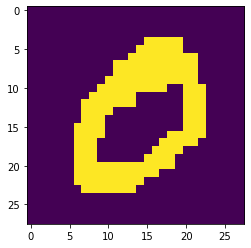

In [35]:
img = torch.zeros(784)
img[x.long()] = 1.0
img = img.view(28, 28)
plt.imshow(img)

In [54]:
len(x)

176

In [63]:
s

Dataset MNIST_Polygon
    Number of datapoints: 60000
    Root location: /Users/davemeijdam/Developer/datasets
    Split: Train

In [25]:
x // 28

tensor([ 5.,  5.,  5.,  6.,  6.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,  7.,  7.,
         8.,  8.,  8.,  8.,  8.,  9.,  9.,  9.,  9.,  9., 10., 10., 10., 10.,
        10., 10., 11., 11., 11., 11., 11., 11., 11., 12., 12., 12., 12., 12.,
        12., 12., 13., 13., 13., 13., 13., 13., 13., 13., 13., 14., 14., 14.,
        14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 17., 17.,
        17., 18., 18., 18., 19., 19., 19., 20., 20., 20., 21., 21., 21., 22.,
        22., 22., 23., 23., 23., 24., 24., 24.])

In [26]:
x % 28

tensor([20., 21., 22.,  4.,  5., 20., 21., 22.,  4.,  5., 19., 20., 21., 22.,
         4.,  5., 19., 20., 21.,  4.,  5., 19., 20., 21.,  3.,  4.,  5., 19.,
        20., 21.,  3.,  4.,  5., 18., 19., 20., 21.,  3.,  4.,  5., 18., 19.,
        20., 21.,  3.,  4.,  5., 15., 16., 17., 18., 19., 20.,  3.,  4.,  5.,
         9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20.,  3.,  4.,
         5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18.,
        19.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 17., 18., 19., 17., 18.,
        19., 17., 18., 19., 17., 18., 19., 17., 18., 19., 17., 18., 19., 17.,
        18., 19., 17., 18., 19., 17., 18., 19.])

In [97]:
len(x)

176

In [101]:
torch.Tensor(list(x) + 608 * [0])

tensor([127., 128., 129., 130., 131., 154., 155., 156., 157., 158., 159., 181.,
        182., 183., 184., 185., 186., 187., 188., 189., 207., 208., 209., 210.,
        211., 212., 213., 214., 215., 216., 217., 235., 236., 237., 238., 239.,
        240., 241., 242., 243., 244., 245., 262., 263., 264., 265., 266., 267.,
        268., 269., 270., 271., 272., 273., 289., 290., 291., 292., 293., 294.,
        295., 296., 297., 300., 301., 302., 316., 317., 318., 319., 320., 321.,
        328., 329., 330., 343., 344., 345., 346., 347., 348., 349., 356., 357.,
        358., 371., 372., 373., 374., 384., 385., 386., 399., 400., 401., 412.,
        413., 414., 426., 427., 428., 429., 440., 441., 442., 454., 455., 456.,
        457., 466., 467., 468., 469., 470., 482., 483., 484., 493., 494., 495.,
        496., 497., 510., 511., 512., 520., 521., 522., 523., 538., 539., 540.,
        547., 548., 549., 550., 566., 567., 568., 569., 570., 571., 572., 573.,
        574., 575., 576., 577., 578., 59

In [39]:
z = []
for a in x:
    z.append((int(a // 28), int(a % 28)))
    
torch.Tensor(z)

tensor([[ 4., 15.],
        [ 4., 16.],
        [ 4., 17.],
        [ 4., 18.],
        [ 4., 19.],
        [ 5., 14.],
        [ 5., 15.],
        [ 5., 16.],
        [ 5., 17.],
        [ 5., 18.],
        [ 5., 19.],
        [ 6., 13.],
        [ 6., 14.],
        [ 6., 15.],
        [ 6., 16.],
        [ 6., 17.],
        [ 6., 18.],
        [ 6., 19.],
        [ 6., 20.],
        [ 6., 21.],
        [ 7., 11.],
        [ 7., 12.],
        [ 7., 13.],
        [ 7., 14.],
        [ 7., 15.],
        [ 7., 16.],
        [ 7., 17.],
        [ 7., 18.],
        [ 7., 19.],
        [ 7., 20.],
        [ 7., 21.],
        [ 8., 11.],
        [ 8., 12.],
        [ 8., 13.],
        [ 8., 14.],
        [ 8., 15.],
        [ 8., 16.],
        [ 8., 17.],
        [ 8., 18.],
        [ 8., 19.],
        [ 8., 20.],
        [ 8., 21.],
        [ 9., 10.],
        [ 9., 11.],
        [ 9., 12.],
        [ 9., 13.],
        [ 9., 14.],
        [ 9., 15.],
        [ 9., 16.],
        [ 9., 17.],


In [74]:
length_list = []

for x, y in s:
    length_list.append(len(x))
    
max_length = max(length_list)
print(max_length)
print(length_list[:10])

for x, y in s:
    zeros = torch.Tensor((max_length - len(x)) * [0])
    x = torch.cat((x, zeros), dim=0)

length_list = []
for x, y in s:
    length_list.append(len(x))
print(length_list[:10])
    


351
[166, 176, 120, 96, 142, 188, 93, 200, 68, 130]
[166, 176, 120, 96, 142, 188, 93, 200, 68, 130]


In [47]:
batch_size = 64
test_batch_size = 1000
epochs = 14
lr = 0.001
gamma = 0.7
log_interval = 10
dry_run = False
save_model = False


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.25)
        )
        
        self.linear = nn.Sequential(
            nn.Linear(9216, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 10)
        )
        
        
#         self.conv1 = nn.Conv2d(1, 32, 3, 1)
#         self.conv2 = nn.Conv2d(32, 64, 3, 1)
#         self.dropout1 = nn.Dropout(0.25)
#         self.dropout2 = nn.Dropout(0.5)
#         self.fc1 = nn.Linear(9216, 128)
#         self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
#         x = self.conv1(x)
#         x = F.relu(x)
#         x = self.conv2(x)
#         x = F.relu(x)
#         x = F.max_pool2d(x, 2)
#         x = self.dropout1(x)
#         x = torch.flatten(x, 1)
#         x = self.fc1(x)
#         x = F.relu(x)
#         x = self.dropout2(x)
#         x = self.fc2(x)


        x = self.conv(x)
        x = torch.flatten(x, 1)
        return self.linear(x)
#         output = F.log_softmax(x, dim=1)
#         return output

In [48]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    criterion = nn.CrossEntropyLoss()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()), end="\r")
            if dry_run:
                break


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    criterion = nn.CrossEntropyLoss(reduction='sum')
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.1f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [77]:
def main():
    # Training settings
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')

    device = "cpu"

    train_kwargs = {'batch_size': batch_size}
    test_kwargs = {'batch_size': test_batch_size}

    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
    dataset1 = MNIST_Polygon('~/Developer/datasets', train=True, download=True, transform=transform)
    dataset2 = MNIST_Polygon('~/Developer/datasets', train=False, transform=transform)
    train_loader = torch.utils.data.DataLoader(dataset1,**train_kwargs)
    test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)

    model = Net().to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    scheduler = StepLR(optimizer, step_size=1, gamma=gamma)
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch)
        test(model, device, test_loader)
        scheduler.step()

    if save_model:
        torch.save(model.state_dict(), "mnist_cnn.pt")
        
main()

RuntimeError: stack expects each tensor to be equal size, but got [166] at entry 0 and [176] at entry 1